In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("drugss.csv")

In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11332 entries, 0 to 11331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     11332 non-null  int64 
 1   drugName     11332 non-null  object
 2   condition    11332 non-null  object
 3   review       11332 non-null  object
 4   rating       11332 non-null  int64 
 5   date         11332 non-null  object
 6   usefulCount  11332 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 619.8+ KB


In [5]:
for col in data.columns:
    print("Col name : ", col, "unique percentage : ", len(data[col].unique())/len(data))

Col name :  uniqueID unique percentage :  1.0
Col name :  drugName unique percentage :  0.10095305330038828
Col name :  condition unique percentage :  0.03679844687610307
Col name :  review unique percentage :  0.7034062830921285
Col name :  rating unique percentage :  0.0008824567596187787
Col name :  date unique percentage :  0.2627073773385104
Col name :  usefulCount unique percentage :  0.020472996823155665


In [6]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,70731,Abacavir / dolutegravir / lamivudine,HIV Infection,"""Thought I would be the first to post as I was...",10,11-Dec-14,76
1,94806,Abilify,Autism,"""My stepson is now 13 years old and has been o...",10,7-Feb-14,141
2,94980,Abilify,Autism,"""My 10 year old son, was on Risperdal and it w...",8,27-Aug-11,105
3,94955,Abilify,Autism,"""Abilify works wonders, but it can have long t...",10,9-Dec-09,103
4,94764,Abilify,Autism,"""After much deliberation and many, many meetin...",5,18-Nov-13,103


In [7]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)

for name, type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [8]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,70731,0,150,7368,10,218,76
1,94806,1,36,6287,10,2709,141
2,94980,1,36,5963,8,1861,105
3,94955,1,36,112,10,2895,103
4,94764,1,36,241,5,947,103


In [9]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
encodings = onehotencoder.fit_transform(data['condition'].values.reshape(-1,1)).toarray()

values = data['condition'].unique()

for val in values:
    data['condition_' + str(val)] = encodings[:,val]
    
data = data.drop(['condition'], axis = 1)
data.head()

,uniqueID,drugName,review,rating,date,usefulCount,condition_150,condition_36,condition_7,condition_373,...,condition_327,condition_47,condition_165,condition_390,condition_225,condition_267,condition_58,condition_177,condition_270,condition_168
0,70731,0,7368,10,218,76,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,94806,1,6287,10,2709,141,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,94980,1,5963,8,1861,105,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,94955,1,112,10,2895,103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,94764,1,241,5,947,103,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
remaining_columns = list(data.columns)
remaining_columns.remove("drugName")

In [11]:
X = data[remaining_columns].values
Y = data['drugName']

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.4, random_state=4)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [14]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(Xtrain, Ytrain)

LinearRegression()

In [15]:
y_pred = linear_model.predict(Xtest)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

In [21]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 7.579147575713386e+28
R-squared: -6.786744666909901e+23


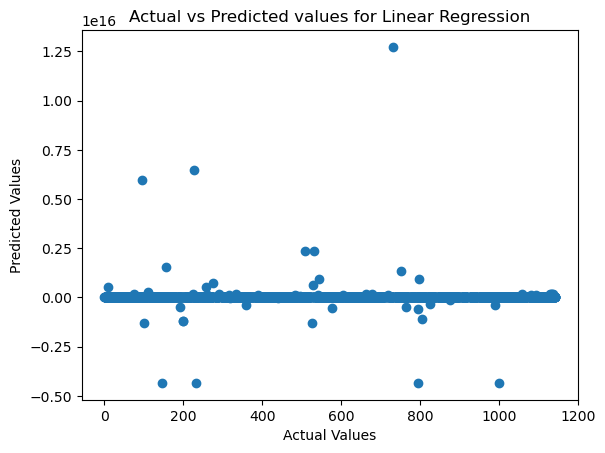

In [22]:
plt.scatter(Ytest, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted values for Linear Regression")
plt.show()